**Plot the MSE values for the DFM specification with 2 Hard+Surveys factors and lag order 3 using four forecast setups**:

- Hard + Surveys  
- Hard + Surveys + Topics  
- Hard + Surveys + Sentiment-adjusted Topics (BPW)
- Hard + Surveys + Sign-adjusted Topics (BCC)

**Evaluation period:** 2008-2018.

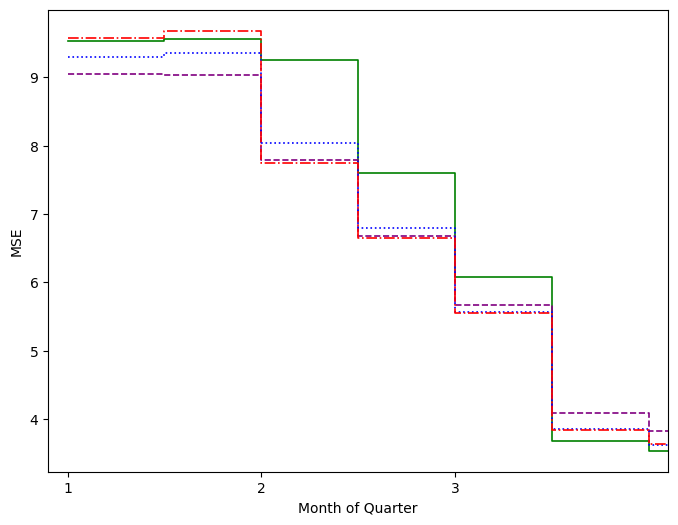

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]
q_var = 'GDP'
text_type = "topics"
text_type_bpw  = "topics_BPW"
text_type_bcc  = "topics_BCC"

estimation_period = "2007"
estimation_period_bcc = "2009"
num_topics = "200"
source = "all"
selected = "_selected"

# Define a mapping for each vintage to a numeric x-value
x_mapping = {
    "M1-01": 1.0,
    "M1-16": 1.5,
    "M2-01": 2.0,
    "M2-16": 2.5,
    "M3-01": 3.0,
    "M3-16": 3.5,
    "M4-01": 4.0
}

# Construct x values based on the vintages
x_values = [x_mapping[col] for col in vintage_col_names]
# Extend the x array so that the last step extends to the end of the x-axis
x_extended = x_values.copy()
x_extended.append(4.1)  # extend x-axis to 4.1

# Directories where the MSE files are stored
mse_dir_hard_surveys = f"../../MSE/DFM_hard_surveys_global_factors_{q_var}"
mse_dir_topics = f"../../MSE/DFM_{text_type}_{estimation_period}_{num_topics}_{source}_separate_factors_{q_var}"
mse_dir_topics_bpw = f"../../MSE/DFM_{text_type_bpw}_{estimation_period}_{num_topics}_{source}_separate_factors_{q_var}"
mse_dir_topics_bcc = f"../../MSE/DFM_{text_type_bcc}_{estimation_period_bcc}_{num_topics}_{source}{selected}_separate_factors_{q_var}"

# For all models use 2 Hard+Surveys factors and lag order 3:
number_HS = 2
number_HS_bpw = 2
number_HS_bcc = 2
order_hard_surveys = 3
order_topics = 3
order_topics_bpw = 3
order_topics_bcc = 3

# Create a single figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Hard+Surveys model (solid line)

# Construct file name based on the model's parameters
factors_str_hard_surveys = f"Global_{number_HS}_{order_hard_surveys}"
mse_file_name_hard_surveys = f"MSE_{q_var}_{factors_str_hard_surveys}.csv"
mse_file_path_hard_surveys = os.path.join(mse_dir_hard_surveys, mse_file_name_hard_surveys)

# Load the MSE values from file
mse_df_hard_surveys = pd.read_csv(mse_file_path_hard_surveys)
# Construct y values based on the vintages
y_values_hard_surveys = [mse_df_hard_surveys[col].iloc[0] for col in vintage_col_names]

# Extend y-values so the step plot holds the last value
y_extended_hard_surveys = y_values_hard_surveys.copy()
y_extended_hard_surveys.append(y_values_hard_surveys[-1]) # Repeat the last value

# Plot the step function for this model
ax.step(x_extended, y_extended_hard_surveys, where='post', linewidth=1.2, color='green',
        label=f"Hard+Surveys (Hard+Surveys Factors: {number_HS}, Order: {order_hard_surveys})")

# Hard+Surveys+Topics model (dashed line)

# Construct file name based on the model's parameters
factors_str_topics = f"HS_{number_HS}_{order_topics}"
mse_file_name_topics = f"MSE_{q_var}_{factors_str_topics}.csv"
mse_file_path_topics = os.path.join(mse_dir_topics, mse_file_name_topics)

# Load the MSE values from file
mse_df_topics = pd.read_csv(mse_file_path_topics)
# Construct y values based on the vintages
y_values_topics = [mse_df_topics[col].iloc[0] for col in vintage_col_names]

# Extend y-values so the step plot holds the last value
y_extended_topics = y_values_topics.copy()
y_extended_topics.append(y_values_topics[-1])

# Plot the step function for this model
ax.step(x_extended, y_extended_topics, where='post', linewidth=1.2, linestyle='--', color = 'purple',
        label=f"Hard+Surveys+Topics (Hard+Surveys Factors: {number_HS}, Text Factors: 1, Order: {order_topics})")

# Hard+Surveys+Topics_BPW model (dotted line)

# Construct file name based on the model's parameters
factors_str_topics_bpw = f"HS_{number_HS_bpw}_{order_topics_bpw}"
mse_file_name_topics_bpw = f"MSE_{q_var}_{factors_str_topics_bpw}.csv"
mse_file_path_topics_bpw = os.path.join(mse_dir_topics_bpw, mse_file_name_topics_bpw)

# Load the MSE values from file
mse_df_topics_bpw = pd.read_csv(mse_file_path_topics_bpw)
# Construct y values based on the vintages
y_values_topics_bpw = [mse_df_topics_bpw[col].iloc[0] for col in vintage_col_names]

# Extend y-values so the step plot holds the last value
y_extended_topics_bpw = y_values_topics_bpw.copy()
y_extended_topics_bpw.append(y_values_topics_bpw[-1])

# Plot the step function for this model
ax.step(x_extended, y_extended_topics_bpw, where='post', linewidth=1.2, linestyle=':', color = 'blue',
        label=f"Hard+Surveys+Topics_BPW (Hard+Surveys Factors: {number_HS_bpw}, Text Factors: 1, Order: {order_topics_bpw})")

# Hard+Surveys+Topics_BCC model (dash-dot line)

# Construct file name based on the model's parameters
factors_str_topics_bcc = f"HS_{number_HS_bcc}_{order_topics_bcc}"
mse_file_name_topics_bcc = f"MSE_{q_var}_{factors_str_topics_bcc}.csv"
mse_file_path_topics_bcc = os.path.join(mse_dir_topics_bcc, mse_file_name_topics_bcc)

# Load the MSE values from file
mse_df_topics_bcc = pd.read_csv(mse_file_path_topics_bcc)
# Construct y values based on the vintages
y_values_topics_bcc = [mse_df_topics_bcc[col].iloc[0] for col in vintage_col_names]

# Extend y-values so the step plot holds the last value
y_extended_topics_bcc = y_values_topics_bcc.copy()
y_extended_topics_bcc.append(y_values_topics_bcc[-1])

# Plot the step function for this model
ax.step(x_extended, y_extended_topics_bcc, where='post', linewidth=1.2, linestyle='-.', color = 'red',
        label=f"Hard+Surveys+Topics_BCC (Hard+Surveys Factors: {number_HS_bcc}, Text Factors: 1, Order: {order_topics_bcc})")

# Customize the plot
ax.set_xlabel("Month of Quarter")
# Set ticks only at 1, 2, and 3 to mark the beginning of each month
ax.set_xticks([1, 2, 3])
ax.set_xlim(0.9, 4.1)
ax.set_ylabel("MSE")
#ax.set_title(f"MSE for Models with {number_HS} Hard+Surveys Factors and 1 Text Factor ({q_var}, 2008-2018): Hard+Surveys vs Hard+Surveys+Topics vs Hard+Surveys+Topics_BPW vs Hard+Surveys+Topics_BCC")
#ax.legend(
#    loc="lower center",
#    bbox_to_anchor=(0.5, -0.3),   
#    ncol=2,                        
#    frameon=False,
#    fontsize=12
#)

# Create the output directory if it doesn't exist and save the plot as PNG and EPS
output_dir = f"DFM_surveys_vs_{text_type}_vs_{text_type_bpw}_{estimation_period}_{num_topics}_{source}_vs_{text_type_bcc}_sel_sep_factors_{q_var}"
os.makedirs(output_dir, exist_ok=True)
base_filename = os.path.join(output_dir, f"DFM_surv_vs_{text_type}_vs_{text_type_bpw}_{estimation_period}_{num_topics}_{source}_vs_{text_type_bcc}_SF_2008-2018_{q_var}_2F_update")
plt.savefig(f"{base_filename}.png", format="png", bbox_inches="tight")
plt.savefig(f"{base_filename}.eps", format="eps", bbox_inches="tight")

plt.show()

**Plot the MSE values for the DFM specification with 2 Hard+Surveys factors and lag order 3 using four forecast setups**:

- Hard + Surveys  
- Hard + Surveys + Topics  
- Hard + Surveys + Sentiment-adjusted Topics (BPW)
- Hard + Surveys + Sign-adjusted Topics (BCC)

**Evaluation subperiods:** 2008-2018, 2008-2010, and 2011-2018.

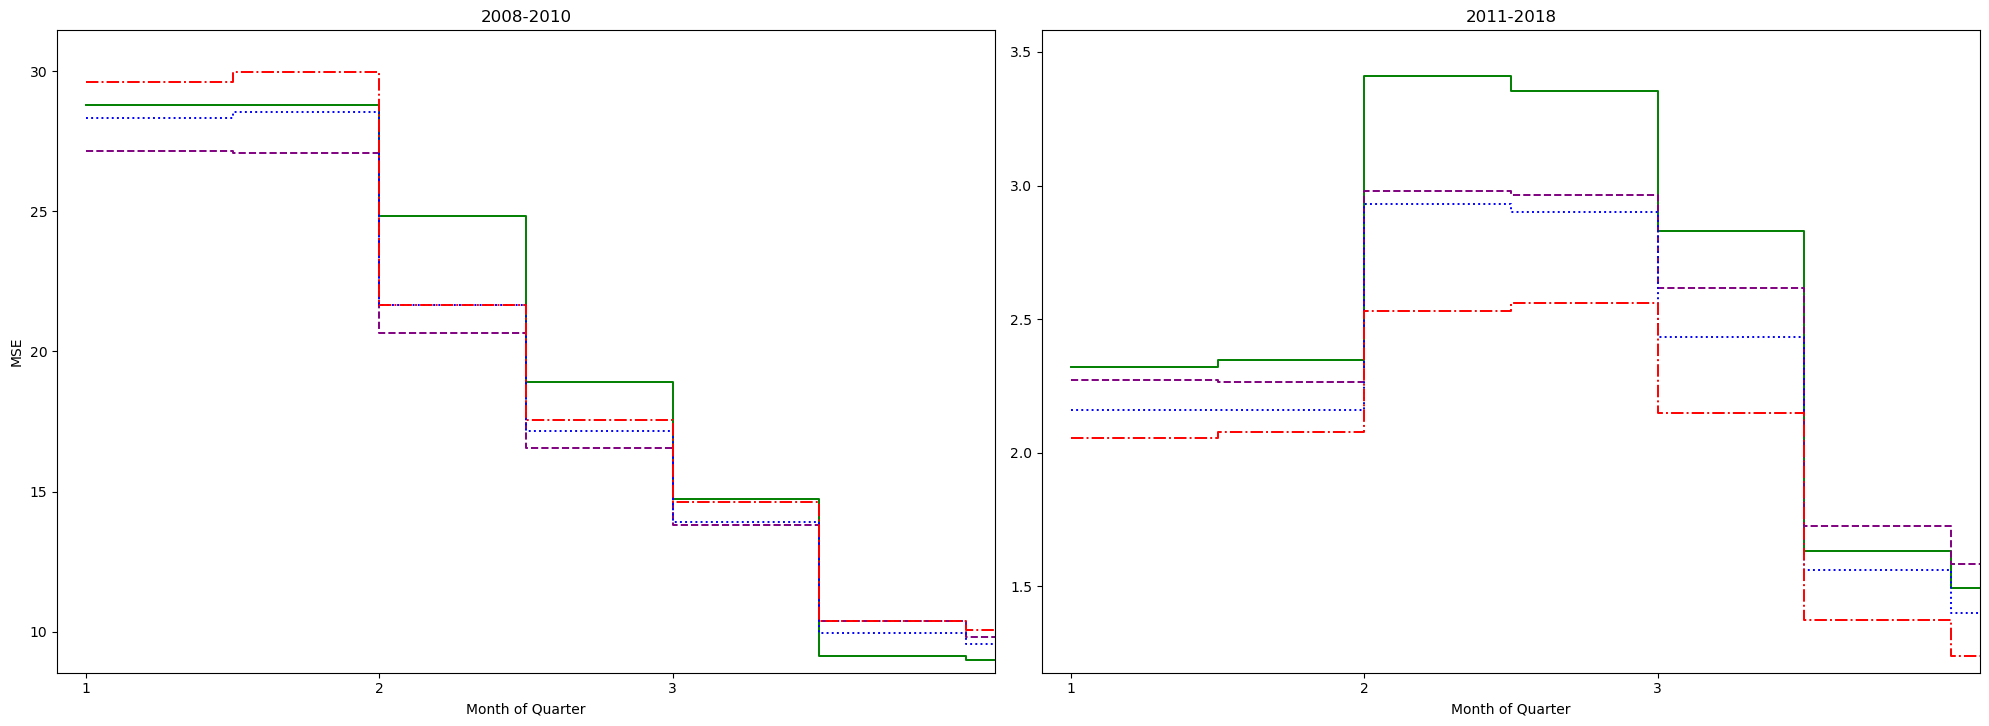

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

def quarter_to_float(q_str):
    """
    Convert a string like 'YYYY-MM'
    into a float: e.g. 2008-03 -> 2008.00, 2008-06 -> 2008.25, etc.
    """
    year = int(q_str[:4])
    month = int(q_str[5:])
    # Map month to fraction of the year
    if month == 3:
        fraction = 0.00
    elif month == 6:
        fraction = 0.25
    elif month == 9:
        fraction = 0.50
    elif month == 12:
        fraction = 0.75
    return year + fraction

# Forecast variable and directories for Hard+Surveys, Hard+Surveys+Topics, Hard+Surveys+Topics_BPW, and Hard+Surveys+Topics_BCC
q_var = 'GDP'
text_type = "topics"
text_type_bpw = "topics_BPW"
text_type_bcc = "topics_BCC"
estimation_period = "2007"
estimation_period_bcc = "2009"
num_topics = "200"
source = "all"
selected = "_selected"
forecasts_dir_hard_surveys = f"../../forecasts/DFM_hard_surveys_global_factors_{q_var}"
forecasts_dir_topics = f"../../forecasts/DFM_{text_type}_{estimation_period}_{num_topics}_{source}_separate_factors_{q_var}"
forecasts_dir_topics_bpw = f"../../forecasts/DFM_{text_type_bpw}_{estimation_period}_{num_topics}_{source}_separate_factors_{q_var}"
forecasts_dir_topics_bcc = f"../../forecasts/DFM_{text_type_bcc}_{estimation_period_bcc}_{num_topics}_{source}{selected}_separate_factors_{q_var}"
actual_growth_file = f"../../{q_var}_growth_actual.csv"

# Vintage columns
vintage_col_names = ["M1-01", "M1-16", "M2-01", "M2-16", "M3-01", "M3-16", "M4-01"]

# Load actual growth data and convert 'date' to float
actual_growth = pd.read_csv(actual_growth_file)
actual_growth["date_float"] = actual_growth["date"].apply(quarter_to_float)
actual_growth.sort_values("date_float", inplace=True)

# Define three periods
periods = {
    #"2008-2018": lambda df: df["date_float"] < 2019,
    "2008-2010": lambda df: df["date_float"] < 2011,
    "2011-2018": lambda df: df["date_float"] >= 2011
}

# Define a mapping for each vintage to a numeric x-value
x_mapping = {
    "M1-01": 1.0,
    "M1-16": 1.5,
    "M2-01": 2.0,
    "M2-16": 2.5,
    "M3-01": 3.0,
    "M3-16": 3.5,
    "M4-01": 4.0
}

# Construct x values based on the vintages and extend to hold the last value
x_values = [x_mapping[col] for col in vintage_col_names]
x_extended = x_values.copy()
x_extended.append(4.1)  # extend x-axis to 4.1

# For all models use 2 Hard+Surveys factors and lag order 3:
number_HS = 2
number_HS_bpw = 2
number_HS_bcc = 2
order_hard_surveys = 3
order_topics = 3
order_topics_bpw = 3
order_topics_bcc = 3

# Create a figure with 1 row and 3 columns (one subplot per period)
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Loop over each period and corresponding subplot axis
for ax, (period_label, period_filter) in zip(axs, periods.items()):
    
    # Hard+Surveys model (solid line)
    
    # Construct forecast file name, e.g., "forecasts_GDP_Global_1_1.csv"
    factors_str_hard_surveys = f"Global_{number_HS}_{order_hard_surveys}"
    forecast_file_name_hard_surveys = f"forecasts_{q_var}_{factors_str_hard_surveys}.csv"
    forecast_file_path_hard_surveys = os.path.join(forecasts_dir_hard_surveys, forecast_file_name_hard_surveys)
    
    # Load forecast data
    forecasts_hard_surveys = pd.read_csv(forecast_file_path_hard_surveys, index_col=0)
    forecasts_hard_surveys.index.name = "date"
    forecasts_hard_surveys.reset_index(inplace=True)
    
    # Merge forecasts with actual growth 
    merged_hard_surveys = pd.merge(forecasts_hard_surveys, actual_growth, on="date", how="inner")
    merged_hard_surveys["date_float"] = merged_hard_surveys["date"].apply(quarter_to_float)
    merged_hard_surveys.sort_values("date_float", inplace=True)
    
    # Filter merged data for the current period
    merged_period_hard_surveys = merged_hard_surveys[ period_filter(merged_hard_surveys) ]
    
    # Calculate MSE for each vintage column over the filtered period
    mse_dict_hard_surveys = {}
    for col in vintage_col_names:
        mse = ((merged_period_hard_surveys[col] - merged_period_hard_surveys["growth"]) ** 2).mean()
        mse_dict_hard_surveys[col] = mse
    
    # Construct y values based on the vintages
    y_values_hard_surveys = [mse_dict_hard_surveys[col] for col in vintage_col_names]
    
    # Extend the y-values so the step function holds the last value
    y_extended_hard_surveys = y_values_hard_surveys.copy()
    y_extended_hard_surveys.append(y_values_hard_surveys[-1]) # Repeat the last value
    
    # Plot the step function for this model
    ax.step(x_extended, y_extended_hard_surveys, where='post', linewidth=1.4, color='green')
    
    # Hard+Surveys+Topics model (dashed line)
    
    # Construct forecast file name, e.g., "forecasts_GDP_HS_1_1.csv"
    factors_str_topics = f"HS_{number_HS}_{order_topics}"
    forecast_file_name_topics = f"forecasts_{q_var}_{factors_str_topics}.csv"
    forecast_file_path_topics = os.path.join(forecasts_dir_topics, forecast_file_name_topics)
    
    # Load forecast data 
    forecasts_topics = pd.read_csv(forecast_file_path_topics, index_col=0)
    forecasts_topics.index.name = "date"
    forecasts_topics.reset_index(inplace=True)
    
    # Merge forecasts with actual growth dates
    merged_topics = pd.merge(forecasts_topics, actual_growth, on="date", how="inner")
    merged_topics["date_float"] = merged_topics["date"].apply(quarter_to_float)
    merged_topics.sort_values("date_float", inplace=True)
    
    # Filter merged data for the current period
    merged_period_topics = merged_topics[ period_filter(merged_topics) ]
    
    # Calculate MSE for each vintage column over the filtered period
    mse_dict_topics = {}
    for col in vintage_col_names:
        mse = ((merged_period_topics[col] - merged_period_topics["growth"]) ** 2).mean()
        mse_dict_topics[col] = mse
        
    # Construct y values based on the vintages
    y_values_topics = [mse_dict_topics[col] for col in vintage_col_names]
    
    # Extend the y-values so the step function holds the last value
    y_extended_topics = y_values_topics.copy()
    y_extended_topics.append(y_values_topics[-1])
    
    # Plot the step function for this model
    ax.step(x_extended, y_extended_topics, where='post', linewidth=1.4, linestyle='--', color='purple')
    
    # Hard+Surveys+Topics_BPW model (dotted line)
    
    # Construct forecast file name, e.g., "forecasts_GDP_HS_1_1.csv"
    factors_str_topics_bpw = f"HS_{number_HS_bpw}_{order_topics_bpw}"
    forecast_file_name_topics_bpw = f"forecasts_{q_var}_{factors_str_topics_bpw}.csv"
    forecast_file_path_topics_bpw = os.path.join(forecasts_dir_topics_bpw, forecast_file_name_topics_bpw)
    
    # Load forecast data 
    forecasts_topics_bpw = pd.read_csv(forecast_file_path_topics_bpw, index_col=0)
    forecasts_topics_bpw.index.name = "date"
    forecasts_topics_bpw.reset_index(inplace=True)
    
    # Merge forecasts with actual growth dates
    merged_topics_bpw = pd.merge(forecasts_topics_bpw, actual_growth, on="date", how="inner")
    merged_topics_bpw["date_float"] = merged_topics_bpw["date"].apply(quarter_to_float)
    merged_topics_bpw.sort_values("date_float", inplace=True)
    
    # Filter merged data for the current period
    merged_period_topics_bpw = merged_topics_bpw[ period_filter(merged_topics_bpw) ]
    
    # Calculate MSE for each vintage column over the filtered period
    mse_dict_topics_bpw = {}
    for col in vintage_col_names:
        mse = ((merged_period_topics_bpw[col] - merged_period_topics_bpw["growth"]) ** 2).mean()
        mse_dict_topics_bpw[col] = mse
        
    # Construct y values based on the vintages
    y_values_topics_bpw = [mse_dict_topics_bpw[col] for col in vintage_col_names]
    
    # Extend the y-values so the step function holds the last value
    y_extended_topics_bpw = y_values_topics_bpw.copy()
    y_extended_topics_bpw.append(y_values_topics_bpw[-1])
    
    # Plot the step function for this model
    ax.step(x_extended, y_extended_topics_bpw, where='post', linewidth=1.4, linestyle=':', color='blue')
    
    # Hard+Surveys+Topics_BCC model (dash-dot line)
    
    # Construct forecast file name, e.g., "forecasts_GDP_HS_1_1.csv"
    factors_str_topics_bcc = f"HS_{number_HS_bcc}_{order_topics_bcc}"
    forecast_file_name_topics_bcc = f"forecasts_{q_var}_{factors_str_topics_bcc}.csv"
    forecast_file_path_topics_bcc = os.path.join(forecasts_dir_topics_bcc, forecast_file_name_topics_bcc)
    
    # Load forecast data 
    forecasts_topics_bcc = pd.read_csv(forecast_file_path_topics_bcc, index_col=0)
    forecasts_topics_bcc.index.name = "date"
    forecasts_topics_bcc.reset_index(inplace=True)
    
    # Merge forecasts with actual growth dates
    merged_topics_bcc = pd.merge(forecasts_topics_bcc, actual_growth, on="date", how="inner")
    merged_topics_bcc["date_float"] = merged_topics_bcc["date"].apply(quarter_to_float)
    merged_topics_bcc.sort_values("date_float", inplace=True)
    
    # Filter merged data for the current period
    merged_period_topics_bcc = merged_topics_bcc[ period_filter(merged_topics_bcc) ]
    
    # Calculate MSE for each vintage column over the filtered period
    mse_dict_topics_bcc = {}
    for col in vintage_col_names:
        mse = ((merged_period_topics_bcc[col] - merged_period_topics_bcc["growth"]) ** 2).mean()
        mse_dict_topics_bcc[col] = mse
        
    # Construct y values based on the vintages
    y_values_topics_bcc = [mse_dict_topics_bcc[col] for col in vintage_col_names]
    
    # Extend the y-values so the step function holds the last value
    y_extended_topics_bcc = y_values_topics_bcc.copy()
    y_extended_topics_bcc.append(y_values_topics_bcc[-1])
    
    # Plot the step function for this model
    ax.step(x_extended, y_extended_topics_bcc, where='post', linewidth=1.4, linestyle='-.', color='red')
    
    # Customize the subplot for the current period
    ax.set_xlabel("Month of Quarter")
    # Set ticks only at 1, 2, and 3 to mark the beginning of each month
    ax.set_xticks([1, 2, 3])
    ax.set_xlim(0.9, 4.1)
    ax.set_title(f"{period_label}")
    
    # Set y-axis limits individually based on each subplot's data range
    y_min = min(min(y_extended_hard_surveys), min(y_extended_topics), min(y_extended_topics_bpw), min(y_extended_topics_bcc))
    y_max = max(max(y_extended_hard_surveys), max(y_extended_topics), max(y_extended_topics_bpw), max(y_extended_topics_bcc))
    ax.set_ylim(0.95 * y_min, 1.05 * y_max)
    
    if ax == axs[0]:
        ax.set_ylabel("MSE")
    
# Create a common legend for the entire figure
handles = [
    Line2D([], [], color='green', lw=1.2, label=f"Hard+Surveys (Hard+Surveys Factors: {number_HS}, Order: {order_hard_surveys})"),
    Line2D([], [], color='purple', lw=1.2, linestyle='--', label=f"Hard+Surveys+Topics (Hard+Surveys Factors: {number_HS}, Text Factors: 1, Order: {order_topics})"),
    Line2D([], [], color='blue', lw=1.2, linestyle=':', label=f"Hard+Surveys+Topics_BPW (Hard+Surveys Factors: {number_HS_bpw}, Text Factors: 1, Order: {order_topics_bpw})"),
    Line2D([], [], color='red', lw=1.2, linestyle='-.', label=f"Hard+Surveys+Topics_BCC (Hard+Surveys Factors: {number_HS_bcc}, Text Factors: 1, Order: {order_topics_bcc})")
]
#fig.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2, prop={'size': 14})

#plt.suptitle(f"MSE for Models with {number_HS} Hard+Surveys Factors and 1 Text Factor ({q_var}): Hard+Surveys vs Hard+Surveys+Topics vs Hard+Surveys+Topics_BPW vs Hard+Surveys+Topics_BCC", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Create the output directory if it doesn't exist and save the combined figure as PNG and EPS
output_dir = f"DFM_surveys_vs_{text_type}_vs_{text_type_bpw}_{estimation_period}_{num_topics}_{source}_vs_{text_type_bcc}_sel_sep_factors_{q_var}"
os.makedirs(output_dir, exist_ok=True)
base_filename = os.path.join(output_dir, f"DFM_surv_vs_{text_type}_vs_{text_type_bpw}_{estimation_period}_{num_topics}_{source}_vs_{text_type_bcc}_SF_allPeriods_{q_var}_2F_update")
plt.savefig(f"{base_filename}.png", format="png", bbox_inches="tight")
plt.savefig(f"{base_filename}.eps", format="eps", bbox_inches="tight")

plt.show()